In [9]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [10]:
data = pd.read_csv("Linear_Regression.csv")
print(pd.DataFrame(data))

       X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]


In [26]:
X = np.array(data["X"])
y = np.array(data["Y"])

X.shape[0]

300

In [27]:
def traintestsplit(X , y , split = 0.8):
    m= X.shape[0]
    Split = int(m*split)
    data1 = np.zeros((m,2))
    data1[: , 0] = X
    data1[: , 1] = y
    
    np.random.shuffle(data1)
    
    Xtrain = data1[:Split , 0] 
    ytrain = data1[:Split , 1]
    Xtest = data1[Split: , 0]
    ytest = data1[Split: , 1]
    
    return Xtrain , ytrain , Xtest , ytest
    
    

In [28]:
Xtrain , ytrain , Xtest , ytest = traintestsplit(X , y , split = 0.8)

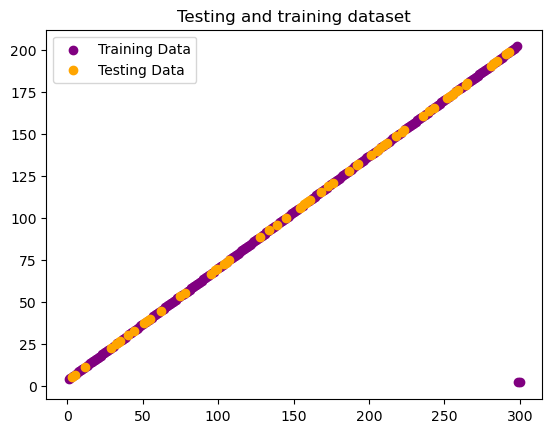

In [29]:
plt.title("Testing and training dataset")
plt.scatter(Xtrain , ytrain , label = "Training Data" , color = "purple")
plt.scatter(Xtest , ytest , label = "Testing Data" , color = "orange")
plt.legend()
plt.show()

In [36]:
def fit(X , y):
    X = np.c_[np.zeros(len(X))+1, X]
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return theta

theta = fit(Xtrain , ytrain)

In [41]:
def predict(X , theta):
        X = np.c_[np.zeros(len(X))+1, X]
        return X.dot(theta)
    
y_predict = predict(Xtest , theta)

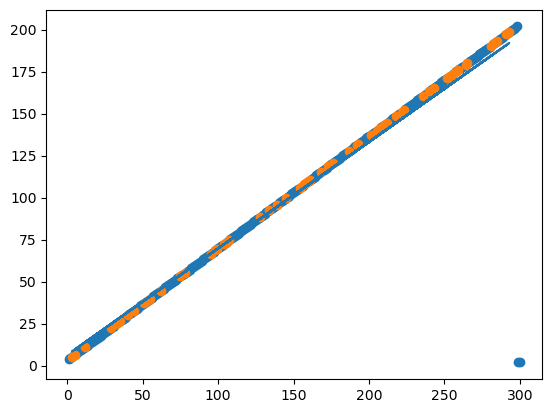

In [42]:
plt.scatter(Xtrain , ytrain , label = "Training dataset")
plt.scatter(Xtest , ytest , label = "Testing dataset")
plt.plot(Xtest , y_predict , label = "Predicted values")
plt.show()

In [43]:
# Model Evaluation

def evaluation(y , y_predict):
    ymean = y.mean()
    num = np.sum((y - y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [44]:
evaluation(ytest , y_predict)

0.9962782437921235